In [67]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [71]:
#Zillow CA Data
zillow_ca_df=pd.read_csv("zillow_ca_homevalue.csv")
#Census CA Data
census_pd=pd.read_csv("census_data.csv")


In [76]:
combined_ca = pd.merge(census_pd, zillow_ca_df, on="Zipcode")
combined_ca["Avg_HomeValue"]= (combined_ca["2016-01"]+combined_ca["2016-02"]+combined_ca["2016-03"]+combined_ca["2016-04"]+
                              combined_ca["2016-05"]+combined_ca["2016-06"]+combined_ca["2016-07"]+combined_ca["2016-08"]+
                              combined_ca["2016-09"]+combined_ca["2016-10"]+combined_ca["2016-11"]+combined_ca["2016-12"])/12
combined_ca = combined_ca[["Zipcode","City","State","CountyName","Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate","average rent","Median Home Value","Number of House Build in year","Avg_HomeValue","Employment Rate"]]
combined_ca.head(10)
#csv
combined_ca.to_csv("Census_Zillow_Combined_CA.csv",index = False)


In [77]:
#Groupby County

combined_county = combined_ca.groupby("CountyName")
combined_county_city = combined_county ["City"].count()
combined_county_city

CountyName
Alameda             46
Amador               8
Butte               12
Calaveras            8
Contra Costa        33
El Dorado           16
Fresno              38
Glenn                2
Humboldt            10
Imperial             5
Inyo                 3
Kern                27
Kings                4
Lake                 7
Lassen               2
Los Angeles        266
Madera               9
Marin               16
Mariposa             3
Mendocino            6
Merced              10
Modoc                1
Mono                 3
Monterey            16
Napa                 7
Nevada               8
Orange              84
Placer              22
Plumas               5
Riverside           60
Sacramento          47
San Benito           3
San Bernardino      58
San Diego           87
San Francisco       24
San Joaquin         24
San Luis Obispo     18
San Mateo           25
Santa Barbara       18
Santa Clara         52
Santa Cruz          12
Shasta               8
Siskiyou             8


In [78]:
# create bin for age range added into combined data sheet
age_bins=[0,20,30,40,50,60,70]
age_group=["0-20","21-30","31-40","41-50","51-60","61-70"]
combined_ca["Age Range"] = pd.cut(combined_ca["Median Age"], age_bins, labels=age_group)
combined_ca.head(10)

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range
0,90001,Florence-Graham,CA,Los Angeles,57942.0,28.0,34323.0,11294.0,18902.0,32.622277,915.0,272200.0,1950.0,2.999500e+05,44.482413,21-30
1,90002,Los Angeles,CA,Los Angeles,51826.0,27.5,32520.0,11212.0,18302.0,35.314321,902.0,248200.0,1951.0,2.946667e+05,40.938911,21-30
2,90003,Los Angeles,CA,Los Angeles,70208.0,28.0,31878.0,10611.0,24556.0,34.976071,958.0,268500.0,1951.0,3.002417e+05,42.456700,21-30
3,90004,Los Angeles,CA,Los Angeles,63095.0,35.5,43180.0,29194.0,12919.0,20.475473,1044.0,838000.0,1946.0,1.168492e+06,57.777954,31-40
4,90005,Los Angeles,CA,Los Angeles,39338.0,33.9,31485.0,20265.0,11520.0,29.284661,943.0,672600.0,1947.0,7.051917e+05,58.897249,31-40
5,90006,Los Angeles,CA,Los Angeles,61230.0,33.6,31993.0,14306.0,17456.0,28.508901,916.0,469200.0,1950.0,5.459500e+05,55.905602,31-40
6,90007,Los Angeles,CA,Los Angeles,41979.0,24.3,22485.0,11658.0,17605.0,41.937635,1000.0,421200.0,1955.0,5.202000e+05,45.208318,21-30
7,90008,Los Angeles,CA,Los Angeles,32060.0,43.7,36134.0,28316.0,6769.0,21.113537,940.0,507900.0,1953.0,6.471167e+05,50.333749,41-50
8,90011,Los Angeles,CA,Los Angeles,104762.0,28.2,31684.0,10103.0,40661.0,38.812737,888.0,294800.0,1944.0,3.203000e+05,44.343369,21-30
9,90012,Los Angeles,CA,Los Angeles,32543.0,35.8,32712.0,21989.0,7755.0,23.830010,1121.0,432700.0,1984.0,4.649500e+05,38.370771,31-40


In [35]:
#sort the data based on Media Home Value
combined_ca=combined_ca.sort_values(["Median Home Value"],ascending=False)
combined_ca=combined_ca.reset_index(drop=True)
combined_ca.head(20)
#get top 20 highest Home Value City
top_20_homevalue = combined_ca.head(10)
top_20_homevalue

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Age Range
0,94028,Portola Valley,CA,San Mateo,6830.0,53.1,229554.0,129377.0,172.0,2.518302,2979.0,2000001.0,1963.0,3.203908e+06,51-60
1,94027,Atherton,CA,San Mateo,7317.0,47.7,243542.0,144323.0,300.0,4.100041,2563.0,2000001.0,1957.0,5.552333e+06,41-50
2,94024,Los Altos,CA,Santa Clara,23057.0,46.3,204534.0,94996.0,718.0,3.114022,2444.0,2000001.0,1960.0,2.797450e+06,41-50
3,92657,Newport Coast,CA,Orange,9768.0,49.8,195051.0,117924.0,194.0,1.986077,2398.0,2000001.0,1998.0,2.571683e+06,41-50
4,93108,Montecito,CA,Santa Barbara,11345.0,50.7,131311.0,90971.0,676.0,5.958572,2377.0,2000001.0,1968.0,2.921217e+06,51-60
5,94022,Los Altos,CA,Santa Clara,19705.0,48.2,194014.0,115724.0,719.0,3.648820,2326.0,2000001.0,1966.0,3.336075e+06,41-50
6,94920,Tiburon,CA,Marin,12725.0,50.2,155710.0,116117.0,463.0,3.638507,2300.0,2000001.0,1967.0,2.532100e+06,51-60
7,90210,Beverly Hills,CA,Los Angeles,20957.0,47.5,146250.0,103832.0,1903.0,9.080498,2143.0,2000001.0,1962.0,4.269000e+06,41-50
8,94957,Ross,CA,Marin,1314.0,46.8,250001.0,122798.0,85.0,6.468798,2050.0,2000001.0,1943.0,3.078942e+06,41-50
9,92662,Newport Beach,CA,Orange,2863.0,57.2,97206.0,99838.0,104.0,3.632553,1958.0,2000001.0,1955.0,2.564192e+06,51-60


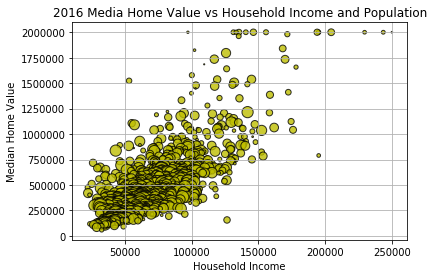

In [50]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["Household Income"]>0)]
#scatter chart Home Value vs population and Household Income
plot_1 = combined_ca.plot(kind = "scatter",x = "Household Income",y = "Median Home Value",s= combined_ca["Population"]/500,
                           c = "y",grid = True, edgecolors="black",alpha =.8,linewidths =1,title = "2016 Media Home Value vs Household Income and Population" )

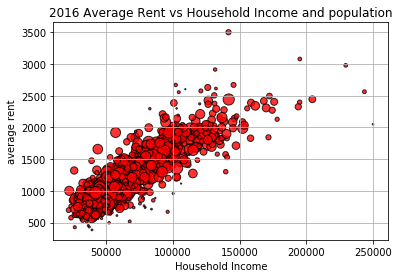

In [62]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["average rent"]>0)]
#scatter chart Avgerage Rent vs  Household Income and population
plot_3 = combined_ca.plot(kind = "scatter",x = "Household Income",y = "average rent",s= combined_ca["Population"]/500,
                           c = "red",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Average Rent vs Household Income and population" )

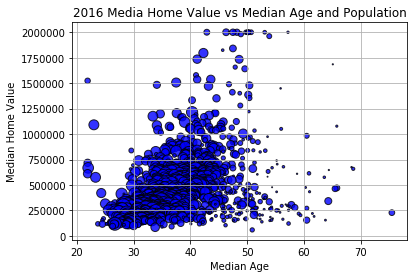

In [59]:
#scatter chart Home Value vs age 
plot_2 = combined_ca.plot(kind = "scatter",x = "Median Age",y = "Median Home Value",s= combined_ca["Population"]/500,
                           c = "blue",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Media Home Value vs Median Age and Population" )

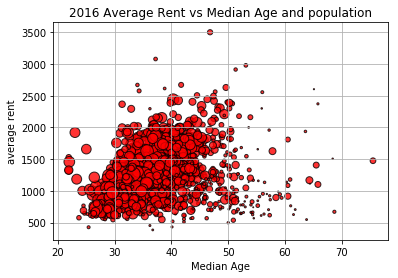

In [61]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["average rent"]>0)]
#scatter chart Avgerage Rent vs age and population
plot_3 = combined_ca.plot(kind = "scatter",x = "Median Age",y = "average rent",s= combined_ca["Population"]/500,
                           c = "red",grid = True, edgecolors="black",alpha =.8,linewidths =1,
                          title = "2016 Average Rent vs Median Age and population" )

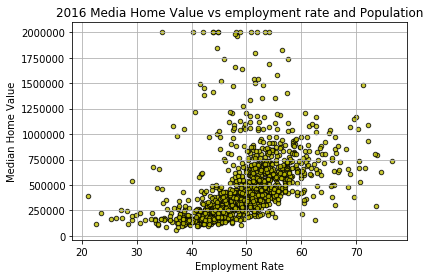

In [80]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["Household Income"]>0)]
#scatter chart Home Value vs population and Household Income
plot_1 = combined_ca.plot(kind = "scatter",x = "Employment Rate",y = "Median Home Value",
                           c = "y",grid = True, edgecolors="black",alpha =.8,linewidths =1,title = "2016 Media Home Value vs employment rate and Population" )

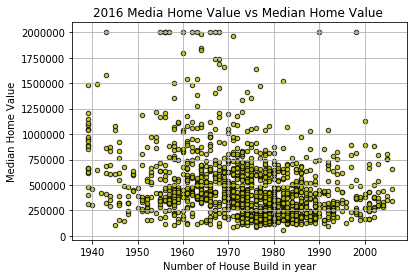

In [83]:
#Clean the non value data in Census "-6666666666"
combined_ca = combined_ca.loc[(combined_ca["Number of House Build in year"]>0)]
#scatter chart Home Value vs population and Household Income
plot_1 = combined_ca.plot(kind = "scatter",x = "Number of House Build in year",y = "Median Home Value",
                           c = "y",grid = True, edgecolors="black",alpha =.8,linewidths =1,title = "2016 Media Home Value vs Median Home Value " )

In [81]:
#sort the data based on Average Rent
combined_ca_1=combined_ca.sort_values(["average rent"],ascending=False)
combined_ca_1.head(10)

,Zipcode,City,State,CountyName,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,average rent,Median Home Value,Number of House Build in year,Avg_HomeValue,Employment Rate,Age Range
172,91108,San Marino,CA,Los Angeles,13675.0,46.8,141739.0,74523.0,1028.0,7.517367,3501.0,1489700.0,1941.0,2.268867e+06,41.542962,41-50
770,94105,San Francisco,CA,San Francisco,6793.0,37.2,195165.0,155649.0,440.0,6.477256,3079.0,790100.0,2003.0,1.191533e+06,73.781834,31-40
750,94028,Portola Valley,CA,San Mateo,6830.0,53.1,229554.0,129377.0,172.0,2.518302,2979.0,2000001.0,1963.0,3.203908e+06,44.802343,51-60
541,92861,Villa Park,CA,Orange,5872.0,51.3,131750.0,59409.0,319.0,5.432561,2913.0,1034400.0,1974.0,1.202675e+06,44.925068,51-60
761,94065,Redwood City,CA,San Mateo,12626.0,41.7,145518.0,73450.0,332.0,2.629495,2671.0,1026800.0,1988.0,1.365358e+06,57.595438,41-50
791,94158,San Francisco,CA,San Francisco,5995.0,34.0,102237.0,72038.0,840.0,14.011676,2670.0,802600.0,2005.0,1.220950e+06,73.377815,31-40
80,90265,Malibu,CA,Los Angeles,18394.0,49.6,126227.0,93324.0,1549.0,8.421224,2630.0,1641200.0,1976.0,2.530758e+06,49.146461,41-50
530,92823,Brea,CA,Orange,3769.0,38.8,132333.0,45492.0,260.0,6.898382,2614.0,711100.0,2001.0,7.517917e+05,51.976652,31-40
914,94970,Stinson Beach,CA,Marin,675.0,65.1,109412.0,70797.0,42.0,6.222222,2603.0,1685100.0,1968.0,2.426133e+06,54.074074,61-70
58,90094,Los Angeles,CA,Los Angeles,8072.0,34.3,121087.0,69563.0,910.0,11.273538,2576.0,754000.0,2005.0,8.774250e+05,61.285927,31-40


In [66]:
#group by age range
combined_ca_1_group=combined_ca_1.groupby(["Age Range"])
avg_home_value = combined_ca_1_group["Median Home Value"].mean()
avg_household_income = combined_ca_1_group["Household Income"].mean()
avg_capita_income = combined_ca_1_group["Per Capita Income"].mean()
avg_rent = combined_ca_1_group["average rent"].mean()
avg_housebuild = combined_ca_1_group["Number of House Build in year"].mean()
combined_ca_1_group =pd.DataFrame({})